In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4
import cartopy.crs as ccrs

In [2]:
g = '/media/rakshith/Seagate Expansion Drive/mraks/land sea ERA.nc'
f7 = netCDF4.Dataset(g)
h = '/media/rakshith/Seagate Expansion Drive/mraks/TGMS ERA 1959-2021, India only.nc'
f8 = netCDF4.Dataset(h)
v1 = f7['lsm'][0, :, :]

k = '/media/rakshith/Seagate Expansion Drive/mraks/CERES.nc'
f9 = netCDF4.Dataset(k)

In [3]:
f9

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Monthly Averages and 07/2005 to 06/2015 Climatology.
    institution: NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions: CF-1.4
    comment: Climatology from 07/2005 to 06/2015
    version: Edition 4.1; Release Date May 28, 2019
    DOI: 10.5067/TERRA-AQUA/CERES/EBAF-TOA_L3B004.1
    dimensions(sizes): lon(360), lat(180), time(265)
    variables(dimensions): float32 lon(lon), float32 lat(lat), int32 time(time), float32 toa_sw_all_mon(time, lat, lon), float32 toa_lw_all_mon(time, lat, lon), float32 toa_net_all_mon(time, lat, lon)
    groups: 

In [4]:
P1 = []
Qnet1 = []
Qdiv1 = []
Pwat1 = []

year1=2000
year2=2022
step = 12
in1 = (year1 - 1959)*step
in2 = (year2 - 1959)*step
for i in range(in1, in2, step):
    sum1 = 0
    sum2 = 0
    sum3 = 0
    sum4 = 0
    for j in range(i+5, i+9):
        v2 = f8['mtnswrf'][j, :, :]
        v3 = f8['mtnlwrf'][j, :, :]
        v4 = f8['mslhf'][j, :, :]
        v5 = f8['msshf'][j, :, :]
        v6 = f8['msnswrf'][j, :, :]
        v7 = f8['msnlwrf'][j, :, :]
        v8 = f8['mtpr'][j, :, :]
        v9 = f8['mer'][j, :, :]
        v10 = f8['tcwv'][j, :, :]
        sum1 = sum1 + v2+v3#+v4+v5+v6+v7
        sum2 = sum2 + 86400*28.96*(v8+v9)
        sum3 = sum3 + v10
        sum4 = sum4 + v2+v3+v4+v5+v6+v7
    x = np.multiply(v1, sum1)
    y = np.multiply(v1, sum2)
    z = np.multiply(v1, sum3)
    a = np.multiply(v1, sum4)
    Qnet1.append(np.average(x[np.nonzero(x)])/4)
    Qdiv1.append(np.average(a[np.nonzero(a)])/4)
    P1.append(np.average(y[np.nonzero(y)])/4)
    Pwat1.append(np.average(z[np.nonzero(z)])/4)

TGMSERA = []
for i in range(len(P1)):
	TGMSERA.append(Qnet1[i]/P1[i])

In [5]:
QCERES=[]

step = 12
in1 = (year1 - 2000)*step + 3
in2 = (year2 - 2000)*step + 3
for i in range(in1, in2, step):
	vc = f10['topo'][100:120, 70:90]
	vc[vc!=1] = 0
	v2 = f9['toa_net_all_mon'][i, 100:120, 70:90]+f9['toa_net_all_mon'][i+1, 100:120, 70:90]+f9['toa_net_all_mon'][i+2, 100:120, 70:90]+f9['toa_net_all_mon'][i+3, 100:120, 70:90]
	y = np.multiply(vc, v2)
	QCERES.append(np.average(y[np.nonzero(y)])/4)

TGMSCERES = []
for i in range(len(P1)):
    TGMSCERES.append(QCERES[i]/P1[i])

NameError: name 'f10' is not defined

Text(0.5, 1.0, 'JJAS average over 10-30N, 70-90E (Land points only)')

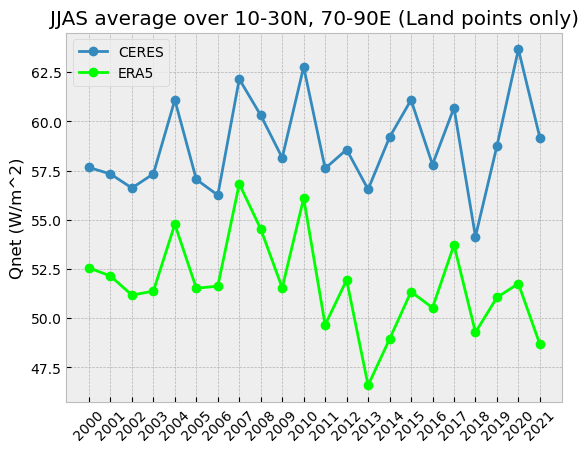

In [6]:
X = np.linspace(2000, 2021, 22, dtype='int')
plt.style.use('bmh')
plt.plot(X, QCERES, marker ='o')
plt.plot(X, Qnet1, c='lime', marker ='o')
plt.ylabel('Qnet (W/m^2)')
plt.xticks(X, X, rotation=45)
plt.legend(['CERES', 'ERA5'])
plt.title("JJAS average over 10-30N, 70-90E (Land points only)")

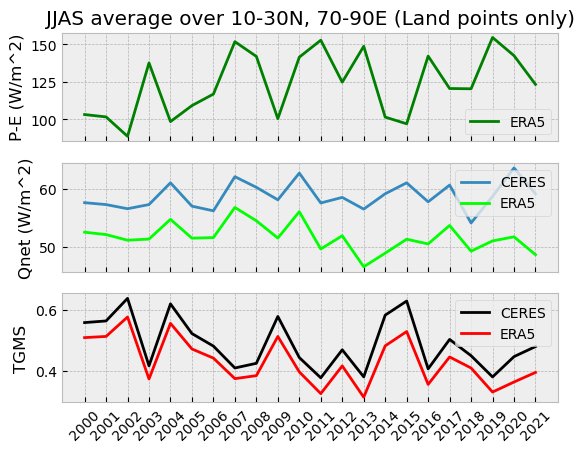

In [9]:
plt.subplot(3,1,1)
plt.plot(X, P1, c='g')
plt.title("JJAS average over 10-30N, 70-90E (Land points only)")
plt.ylabel('P-E (W/m^2)')
plt.tick_params(labelbottom=False)
plt.xticks(X, X, rotation=45)
plt.legend(['ERA5'])


plt.subplot(3,1,2)
plt.plot(X, QCERES)
plt.plot(X, Qnet1, c='lime')
plt.ylabel('Qnet (W/m^2)')
plt.tick_params(labelbottom=False)
plt.xticks(X, X, rotation=45)
plt.legend(['CERES', 'ERA5'])

plt.subplot(3,1,3)
plt.plot(X, TGMSCERES, c='black')
plt.plot(X, TGMSERA, c='r')
plt.ylabel('TGMS')
plt.legend(['CERES', 'ERA5'])
plt.xticks(X, X, rotation=45)
plt.show()

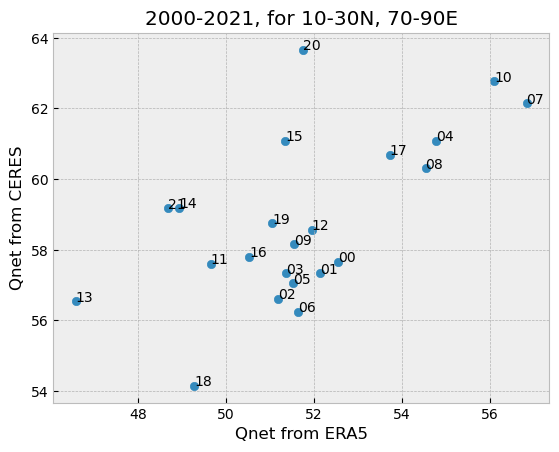

In [11]:
plt.scatter(Qnet1, QCERES)
plt.xlabel('Qnet from ERA5')
plt.ylabel('Qnet from CERES')
plt.title('2000-2021, for 10-30N, 70-90E')
for i in range(len(Qnet1)):
    plt.annotate(str(X[i])[-2:],(Qnet1[i], QCERES[i]))